In [24]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [3]:
# récupération du fichier csv
df = pd.read_csv('../spotify.csv', encoding='latin1')

print(df.head())


                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [4]:
#liste des colonnes
print(df.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


In [5]:
#Statistiques des colonnes
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [9]:
#Suppression des doublons et des valeurs manquantes
df = df.drop_duplicates()
df = df.dropna()
df.describe()


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,1.567931,2018.457772,6.018360,13.696450,4849.898409,11.722154,60.161567,49.473684,2.451652,122.565483,67.391677,51.201958,64.362301,26.309670,1.676867,18.168911,10.526316
std,0.876211,10.829267,3.572554,9.299663,7741.126455,18.617668,74.923594,49.570455,5.397024,28.174803,14.688458,23.620978,16.107587,25.470972,8.767328,13.541996,10.219987
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,5.000000,829.000000,0.000000,12.000000,6.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2040.000000,3.000000,32.000000,34.000000,0.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4890.000000,16.000000,78.000000,84.000000,2.000000,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,532.000000,275.000000,45.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


Standardisation des données 

In [15]:
#Sélection des colonnes numériques

df_num = df.select_dtypes(include = ['float64', 'int64'])
print(df_num.head())

#standardisation des données

scaler = StandardScaler()
df_standardise = scaler.fit_transform(df_num)
df1 = pd.DataFrame(df_standardise, columns=df_num.columns)
print(df_standardise)

   artist_count  released_year  released_month  released_day  \
0             2           2023               7            14   
1             1           2023               3            23   
2             1           2023               6            30   
3             1           2019               8            23   
4             1           2023               5            18   

   in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
0                   553                147                  43   
1                  1474                 48                  48   
2                  1397                113                  94   
3                  7858                100                 116   
4                  3133                 50                  84   

   in_apple_charts  in_deezer_charts  bpm  danceability_%  valence_%  \
0              263                10  125              80         89   
1              126                14   92              71         61   
2 

Normalisation des données 

In [20]:
#Sélection des colonnes numériques

df_num = df.select_dtypes(include = ['float64', 'int64'])


#normalisation des données

scaler = MinMaxScaler()
df_normalise = scaler.fit_transform(df_num)
df2 = pd.DataFrame(df_normalise, columns=df_num.columns)


print(df2)

     artist_count  released_year  released_month  released_day  \
0        0.142857       1.000000        0.545455      0.433333   
1        0.000000       1.000000        0.181818      0.733333   
2        0.000000       1.000000        0.454545      0.966667   
3        0.000000       0.956989        0.636364      0.733333   
4        0.000000       1.000000        0.363636      0.566667   
..            ...            ...             ...           ...   
812      0.000000       0.989247        0.909091      0.066667   
813      0.000000       0.989247        0.818182      0.666667   
814      0.142857       0.989247        0.909091      0.066667   
815      0.285714       0.989247        0.818182      0.633333   
816      0.000000       0.989247        0.909091      0.100000   

     in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
0                0.009874           1.000000            0.080827   
1                0.027295           0.326531            0.090226   
2  

Détection des valeurs aberrantes 

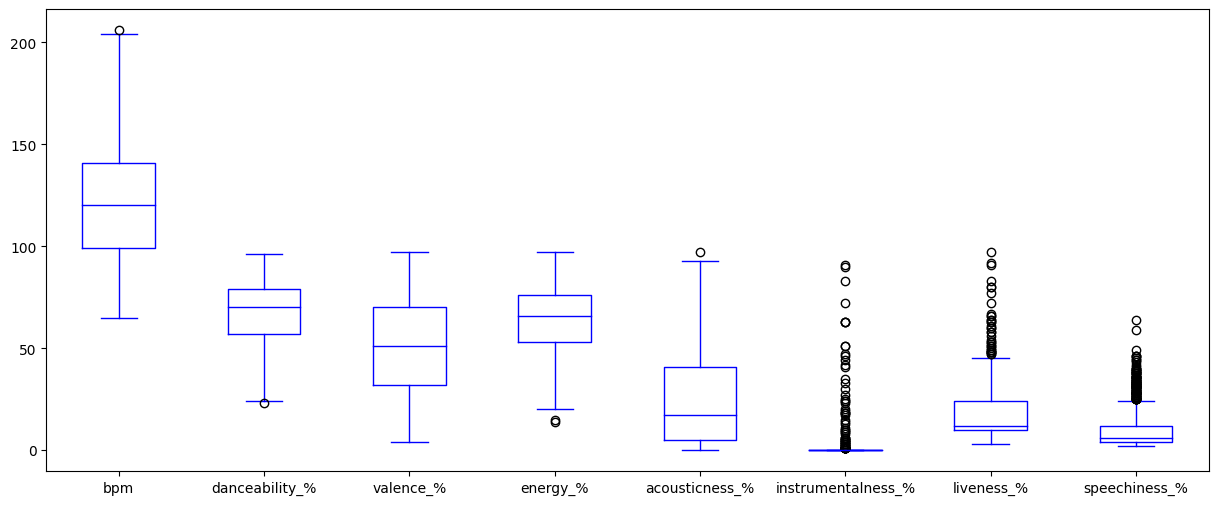

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
df.boxplot(column=['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%','instrumentalness_%', 'liveness_%', 'speechiness_%'], grid=False, ax=ax, color='blue')

plt.show()


Encodage des valeurs catégorielles

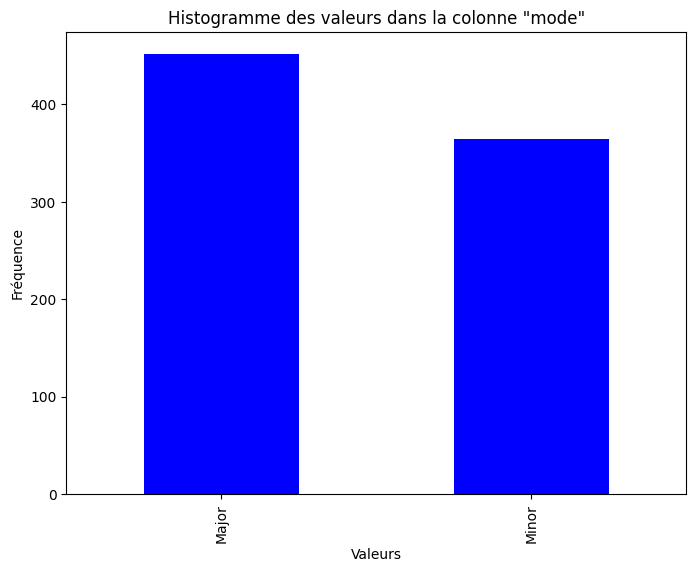

In [39]:

plt.figure(figsize=(8, 6))  
df['mode'].value_counts().plot(kind='bar', color='blue')

plt.title('Histogramme des valeurs dans la colonne "mode"')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

plt.show()

In [49]:
#Encodage des valeurs de la colonne mode
df['mode'] = df['mode'].replace({'Minor': 0, 'Major': 1})


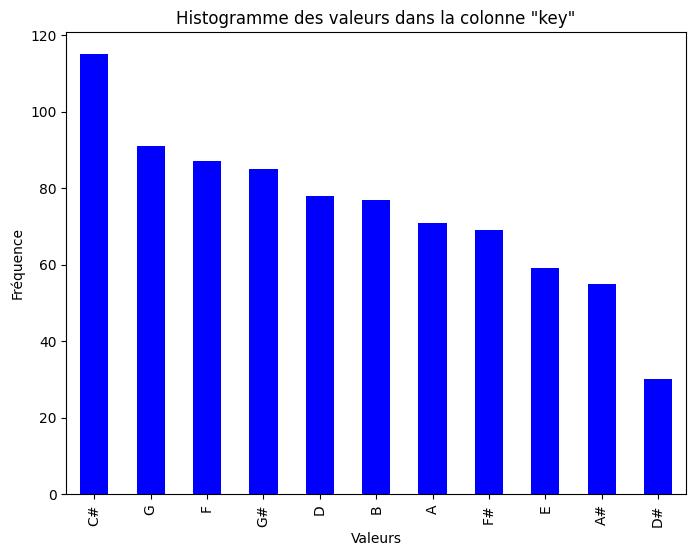

In [41]:
plt.figure(figsize=(8, 6))  
df['key'].value_counts().plot(kind='bar', color='blue')

plt.title('Histogramme des valeurs dans la colonne "key"')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')


plt.show()

In [48]:
#Encodage des valeurs de la colonne key
notes = sorted(df['key'].unique())
encoding_map = {note: idx + 1 for idx, note in enumerate(notes)}
df['mode_encoded'] = df['mode'].map(encoding_map)


